# Machine Learning Homework 5 - Final Project

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

## Data Loading

In [1]:
# Import Packages
import pandas as pd
import numpy as np

In [2]:
def data_load():
    # Loading Comma Seperated Data using read_table pandas function in 'census_train_data' and 'census_test_data' dataframe
    census_train_data= pd.read_csv('census_train.csv')
    census_test_data = pd.read_csv('census_test.csv')

    # Adding Headers to Data
    census_train_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin", "wages"]

    census_test_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin"]

    # Add Wages column to test dataset for consistency
    census_test_data['wages'] = 0
    frames = [census_train_data, census_test_data]
    df = pd.concat(frames)
    df.shape
    return census_train_data, census_test_data, df

## Data Preprocessing

In [3]:
census_train_data, census_test_data, df = data_load()

# Check is any Null Values
df.isnull().values.any()

False

<div style="color:blue">
No Null values found. In this dataset, the symbol ? is used to indicate the value N/A (not applicable).
</div>

<div style="color:blue">
No Missing Values Found in:  
- idnum  
- age  
- interestincome  
- marital  
- sex  
- ancestry  
- wages  
<br/><br/>
<b>Age:</b>
<ul>
   <li>
       Found 22 people with age less than 16 and workerclass as "?" - Assign New Category (10): Age less than 16.</li>
   <li>
       Found 378 people who are currently non-worker - Assign New Category (11): People who never worked and not in labour force and last worked more than 5 years ago.
   </li>
</ul>
<br/>
<b>Travel time to work:</b>
<p>As the data say's, "?" are either not a worker or worker who worked at home. Therefore, they will never travel as they are working from home. Same applies to a worker who never worked.</p>
<br/>
<b>Vehicle Occupancy:</b>
<ul>
<li>People who are non-worker (Derived from workerclass) and using means of transport as (10 - Walk) or (11 - Work at home) are assumed never travelled - Assign New Category (0): Never travelled.</li>
<li>People using means of transport as (02 - Bus), (04 - Subway), and (05 - Railroad) are all public transport. Hence, we assigned them Category 10 - Carpool for 10 or more.</li>
<li>People using other means of transport and other missing values are assigned with New Category 11 - Other.</li>
</ul>
<br/>
<b>School Enrollment and Education Attain:</b>
<p>As the data say's, "?" are of age less than 3 years. In US, to enroll in school, the requirement is atleast 5 years. Hence, we assign a New Category here, 0 - No, less than 3 years.</p>
<br/>
<b>Work Arrival Time and Hours Per Week:</b>
<p>As the data depicts "?" as a non-worker. We assume that he/she will not travel to work and hence replace values with 0.</p>
<br/>
<b>Degree Field:</b>
<p>As the data depicts "?" as a degree less than bachelor's degree, we assign new category label 1000.</p>
<br/>
<b>Industry Worked In:</b>
<p>As the data depicts "?" a non-worker, we assign new category label 0100.</p>
<br/>
</div>

In [4]:
# Preprocess data and feature creation
def pre_process_data(data):
    
    # Cleaning workerclass
    # age less than 16 
    data.loc[(data.age <= 16) & (data.workerclass =='?') , 'workerclass'] = '10'
    # people who never worked and not in labour force and last worked more than 5 years ago
    data.loc[(data.traveltimetowork =='?') & (data.vehicleoccupancy =='?') & \
             (data.meansoftransport =='?') & (data.workarrivaltime =='?') & \
             (data.hoursworkperweek =='?') & (data.industryworkedin =='?') & (data.workerclass =='?'), 'workerclass'] = '11' 
     
    # Cleaning traveltimetowork - Filling it with zero's (New Category) as worker who works from home will never travel, 
    # Same applies to a worker who never worked.
    data['traveltimetowork'] = data['traveltimetowork'].replace('?', 0)

    # Cleaning vehicleoccupancy
    # Category 0 - Never Travelled
    data.loc[(data.workerclass == '10') | (data.workerclass == '11') | (data.traveltimetowork == 0) \
             | (data.meansoftransport == '10') | (data.meansoftransport == '11'), 'vehicleoccupancy'] = '0'    
    # Category 10 - Carpool for 10 or more
    data.loc[(data.meansoftransport == '02') | (data.meansoftransport == '04')\
             | (data.meansoftransport == '05'), 'vehicleoccupancy'] = '10'
    # Cateogory 11 - Boat, Taxi, Cycle, Other and NAs
    data['vehicleoccupancy'] = data['vehicleoccupancy'].replace('?', '11')

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['meansoftransport'] = data['meansoftransport'].replace('?', '0')

    # Cleaning schoolenrollment - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No, less than 3 years
    data['schoolenrollment'] = data['schoolenrollment'].replace('?', '0')

    # Cleaning educationalattain - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No Education Attainment, less than 3 years
    data['educationalattain'] = data['educationalattain'].replace('?', '0')

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['workarrivaltime'] = data['workarrivaltime'].replace('?', '0')

    # Cleaning hoursworkperweek - Filling it with zero's (New Category) for non-worker
    data['hoursworkperweek'] = data['hoursworkperweek'].replace('?', 0)

    # Cleaning degreefield - Filling it with 1111 (New Category) for unknown degree
    # 1000, less than bachelor's degree (Related to educationattain)
    data['degreefield'] = data['degreefield'].replace('?', '1000')

    # Cleaning industryworkedin - Filling it with 1111 (New Category) for unknown degree
    # 100, less than 16 years old/not in labor force who last worked more than 5 years ago or never worked
    data['industryworkedin'] = data['industryworkedin'].replace('?', '0100')
        
    # Convert the categories feature to type 'category'
    data['workerclass'] = data['workerclass'].astype('category')
    data['vehicleoccupancy'] = data['vehicleoccupancy'].astype('category')
    data['meansoftransport'] = data['meansoftransport'].astype('category')
    data['marital'] = data['marital'].astype('category')
    data['schoolenrollment'] = data['schoolenrollment'].astype('category')
    data['educationalattain'] = data['schoolenrollment'].astype('category')
    data['sex'] = data['sex'].astype('category')
    data['workarrivaltime'] = data['workarrivaltime'].astype('category')
    data['ancestry'] = data['ancestry'].astype('category')
    data['degreefield'] = data['degreefield'].astype('category')
    data['industryworkedin'] = data['industryworkedin'].astype('category')
    
    # Convert numerical features to type 'int'
    data['idnum'] = data['idnum'].astype(int)
    data['age'] = data['age'].astype(int)
    data['interestincome'] = data['interestincome'].astype(int)
    data['traveltimetowork'] = data['traveltimetowork'].astype(int)
    data['hoursworkperweek'] = data['hoursworkperweek'].astype(int)
    data['wages'] = data['wages'].astype(int)
        
    return data

In [5]:
# Drop given columns
def data_drop(data, columns):
    if columns is not None:
        data = data.drop(columns ,axis=1)
    return data

In [6]:
# Perform Data Cleaning
clean_data = pre_process_data(df)
df = clean_data
df.head(5)

,idnum,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,1,34,3,0,10,1,1,5,1,1,1,168,40,51,1000,7860,34500
1,2,57,2,0,15,8,1,5,1,1,1,100,30,51,1000,8390,4700
2,3,17,11,0,0,0,0,5,2,2,2,0,0,714,1000,0100,0
3,4,42,1,0,20,1,1,1,1,1,1,92,45,21,5001,6990,120000
4,5,18,11,0,0,0,0,5,2,2,2,0,0,999,1000,0100,0


## Feature Engineering  
<div style="color:blue">
<br/><br/>
<b>Mutual Information</b>
<p>Sci-kit learn’s mutual_info_regression() function was used to get the mutual information of each feature with the target variable.</p>
</div>

In [7]:
# Mutual Infogain plot
def plot_info(data, title):
    
    feature_name = data.keys()
    importance = data.values()
    
    # Plotting Feature_Names on X-Axis and Feature_importances on Y-Axis
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(feature_name)), importance)
    plt.xticks(range(len(feature_name)), feature_name, rotation=40)
    plt.xlabel('Feature Name')
    plt.ylabel('Feature Importance')
    plt.title(title)
    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


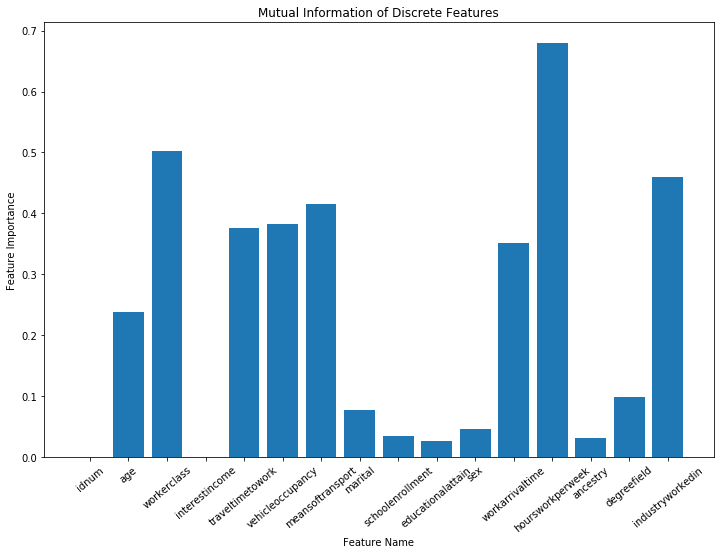

In [8]:
# Mutual Information Gain
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

mutual_df_train = df[:1183]
mutual_df_train_X = mutual_df_train.drop(['wages'], axis=1)
mutual_df_train_y = mutual_df_train['wages']
dis_mutual_info = mutual_info_regression(mutual_df_train_X, mutual_df_train_y, copy = True)
dis_res = dict(zip(df.columns.values, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features")

<div style="color:blue">
Based on Information Gain, we drop:  
- idnum  
- interestincome  
- ancestry  
- schoolenrollment
</div>

In [9]:
# Drop Columns
columns = ['interestincome', 'ancestry', 'schoolenrollment']
clean_data = data_drop(clean_data, columns)
df = clean_data
df.head(5)

,idnum,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages
0,1,34,3,10,1,1,5,1,1,168,40,1000,7860,34500
1,2,57,2,15,8,1,5,1,1,100,30,1000,8390,4700
2,3,17,11,0,0,0,5,2,2,0,0,1000,0100,0
3,4,42,1,20,1,1,1,1,1,92,45,5001,6990,120000
4,5,18,11,0,0,0,5,2,2,0,0,1000,0100,0


### Feature Creation

![title](Visualizations/Age-Education-Wage.png)

<div style="color:blue">
<b>Productivity:</b>
<p>From the graph, we can see from the trend line, the wages are high for the people with higher degree and the young age. Productivity of a person decreases as he/she ages. Hence, we created a formula deriving our new feature using Education attain and Age.</p>
<br/>
<b>Wage Class:</b>
<p>This target feature is derived from wages to use in a binary classifier to find where a persons earns or not.  
0- Person does not earns, 1 - Person Earns.</p>
</div>

In [10]:
def feature_creation(data):
    # Productivity
    data['productivity'] = data['educationalattain'].astype(int)-data['age'].astype(int)
    
    # Wage Class - For Binary Classifier
    data['wageclass'] = np.where(data['wages'] == 0, 0, 1)
    
    # Convert numerical features to type 'int'
    data['wageclass'] = data['wageclass'].astype(int)
    data['productivity']  = data['productivity'].astype(int)
    
    return df

In [11]:
# Add Derived Features
df = feature_creation(df)
df.head(5)

,idnum,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages,productivity,wageclass
0,1,34,3,10,1,1,5,1,1,168,40,1000,7860,34500,-33,1
1,2,57,2,15,8,1,5,1,1,100,30,1000,8390,4700,-56,1
2,3,17,11,0,0,0,5,2,2,0,0,1000,0100,0,-15,0
3,4,42,1,20,1,1,1,1,1,92,45,5001,6990,120000,-41,1
4,5,18,11,0,0,0,5,2,2,0,0,1000,0100,0,-16,0


In [12]:
# From our combined we get back our train & test datasets
train = df[:1183]
test = df[1183:]

print(train.shape)
print(test.shape)

# Combine train and test so we can continue performing other operations on the whole dataset
frames = [train, test]
df = pd.concat(frames)
print(df.shape)

# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(1183, 16)
(499, 16)
(1682, 16)


(array([], dtype=int64),)

## Data Transformation - Scaling and One-Hot Encoding

## Scaling  
<br/>
<div style="color:blue">
<p>We standardize the range of numerical features of data by scaling. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.</p>
</div>

In [13]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    # Get all numeric features
    numerical_features = []
    for feature in df.dtypes.index:
        # Exclude the target variable 'wages' and 'idnum' column    
        if (df[feature].dtype != np.object) and (str(df[feature].dtype) != 'category') \
                and (feature != 'wages') and (feature != 'wageclass') and (feature != 'idnum'):
            numerical_features.append(feature)

    print(numerical_features)
    
    # Perform Standard Scaling for numerical features only
    scaler = StandardScaler()

    # Again, from our combined df we get back our train & test datasets
    train = df[:1183]
    test = df[1183:]

    train.loc[:,numerical_features] = scaler.fit_transform(train[numerical_features])
    test.loc[:,numerical_features] = scaler.transform(test[numerical_features])

    # Combine train and test so we can continue performing other operations on the whole dataset
    frames = [train, test]
    df = pd.concat(frames)

    return df

In [14]:
df = perform_scaling(df)
df.head(5)

['age', 'traveltimetowork', 'hoursworkperweek', 'productivity']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,idnum,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages,productivity,wageclass
0,1,-0.701676,3,-0.275096,1,1,5,1,1,168,0.795301,1000,7860,34500,0.684744,1
1,2,0.444641,2,-0.072684,8,1,5,1,1,100,0.321874,1000,8390,4700,-0.448610,1
2,3,-1.548954,11,-0.679921,0,0,5,2,2,0,-1.098406,1000,0100,0,1.571717,0
3,4,-0.302957,1,0.129729,1,1,1,1,1,92,1.032014,5001,6990,120000,0.290534,1
4,5,-1.499114,11,-0.679921,0,0,5,2,2,0,-1.098406,1000,0100,0,1.522441,0


In [15]:
# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(array([], dtype=int64),)

In [16]:
import seaborn as sns

corr_df_train = df[:1183]

# check for any correlations between variables
corr = corr_df_train.corr()
sns.heatmap(corr, cmap='YlGnBu', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, linewidths=0.5)

## One-Hot Encoding

<div style="color:blue">
<p>Perform One Hot Encoding to convert categorical features into a form that could be provided to ML algorithms to do a better job in prediction..</p>
</div>

In [17]:
def perform_one_hot_encoding(df):
    # Get all categorical features
    categorical_features = []
    for feature in df.dtypes.index:
        if (str(df[feature].dtype) == 'category'):
            categorical_features.append(feature)

    print(categorical_features)
    
    # Perform One-Hot Encoding
    df_dummies = pd.get_dummies(df[categorical_features])
    df = df.drop(df[categorical_features],axis=1)
    df = pd.concat([df, df_dummies],axis=1)
    return df

In [18]:
df = perform_one_hot_encoding(df)
df.head(5)

['workerclass', 'vehicleoccupancy', 'meansoftransport', 'marital', 'educationalattain', 'sex', 'workarrivaltime', 'degreefield', 'industryworkedin']


,idnum,age,traveltimetowork,hoursworkperweek,wages,productivity,wageclass,workerclass_1,workerclass_10,workerclass_11,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,1,-0.701676,-0.275096,0.795301,34500,0.684744,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.444641,-0.072684,0.321874,4700,-0.448610,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1.548954,-0.679921,-1.098406,0,1.571717,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.302957,0.129729,1.032014,120000,0.290534,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,-1.499114,-0.679921,-1.098406,0,1.522441,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# For the last time, from our combined df we get back our train & test datasets.
train = df[:1183]#1183
test = df[1183:]

test = test.drop(['wages','wageclass'],axis=1)

print(train.shape)
print(test.shape)

(1183, 493)
(499, 491)


## Modeling

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(actual, predictions):
    predictions = np.round(predictions/100)*100
    mse = mean_squared_error(actual, predictions)
    return sqrt(mse)

In [21]:
# Seperating features and labels
X = train.drop(['idnum', 'wages', 'wageclass'],axis=1)
y = train[['wages', 'wageclass']]
X.head(5)

,age,traveltimetowork,hoursworkperweek,productivity,workerclass_1,workerclass_10,workerclass_11,workerclass_2,workerclass_3,workerclass_4,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,-0.701676,-0.275096,0.795301,0.684744,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.444641,-0.072684,0.321874,-0.448610,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.679921,-1.098406,1.571717,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.302957,0.129729,1.032014,0.290534,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.679921,-1.098406,1.522441,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y.head(5)

,wages,wageclass
0,34500,1
1,4700,1
2,0,0
3,120000,1
4,0,0


In [23]:
from sklearn.model_selection import train_test_split

# Train-Test Split
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(828, 490)
(828, 2)
(355, 490)
(355, 2)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<div style="color:blue">
<p>Initially, we do predictions on whether a person is earning or not. As it is a classification problem, we will be using different classifiers for this case and choose the best one. Classification predictions will be better as compared to regression predictions as regression problems have real value while classification has binary value. We will take only predictions for a person classified as not earning in final predictions and predictions for the person who earns will be done using regressor.
</p>

## Classifier Hyperparameter Tuning

### Random Forest Classifier

In [557]:
# Parameter Tuning - Classifiers
# Random Forest
from sklearn.model_selection import RandomizedSearchCV

def random_forest_classifier_tuning():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(x_train, y_train['wageclass'])
    return rf_random.best_params_

In [558]:
rf_random_best_params = random_forest_classifier_tuning()
rf_random_best_params

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.7s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.7s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.7s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   15.0s finished


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 600}

### Decision Tree Classifier

In [559]:
# Decision Tree - Parameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

def decision_tree_classifier_tuning():
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_features = [1,2,3,4,5,6,7,8,9,10]
    min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
    min_samples_split = [2,3,4,5,6,7,8,9,10]
    criterion = ["gini", "entropy"]
    random_grid = {"max_depth": max_depth,
                  "max_features": max_features,
                  "min_samples_leaf": min_samples_leaf,
                  "min_samples_split":min_samples_split,
                  "criterion": criterion}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    decision_tree = DecisionTreeClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    dt_random = GridSearchCV(estimator = decision_tree, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
    # Fit the random search model
    dt_random.fit(x_train, y_train['wageclass'])
    return dt_random.best_params_

In [ ]:
dt_random_best_params = decision_tree_classifier_tuning()
dt_random_best_params

In [24]:
# Classification Predictions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Name=[]
Accuracy=[]

# Defining Models with Default Parameters
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 70, max_features = 7, \
                                       min_samples_leaf = 1, min_samples_split = 10)
random_forest = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2, \
                                       max_features = 'sqrt', max_depth = 50, bootstrap = True)

# Running Models with Default Parameters and Cross-Validation
for model, label in zip([decision_tree, random_forest], \
                        ['Decision Tree', 'Random Forest']):
    # Evaluate Model Score by performing 5-fold Cross-Validation
    scores = cross_val_score(model, x_train, y_train['wageclass'], cv=5, scoring='accuracy')
    # Consider Mean of Model Scores
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy: 0.914325 of model Decision Tree
Accuracy: 0.969857 of model Random Forest


<div style="color:blue">
After tuning, Random Forest Classifier gives a good classification accuracy and hence, we will use for our final binary predictions.
</div>

## Model Selection - Classifier (Random Forest)

In [25]:
# Classification Model
random_forest_classifier = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2, \
                                       max_features = 'sqrt', max_depth = 50, bootstrap = True)

# Fit the model
random_forest_classifier.fit(x_train, y_train['wageclass'])

# Predictions
classifier_predictions = random_forest_classifier.predict(x_test)

## Regressor Hyperparameter Tuning

In [26]:
# Import Model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, make_scorer

### Random Forest Regressor

In [665]:
from sklearn.model_selection import RandomizedSearchCV
def rf_tuning():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    rf_random.fit(x_train, y_train)
    return rf_random.best_params_

In [ ]:
rf_best_params = rf_tuning()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV] n_estimators=600, min_samples_split=10

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   50.0s finished


In [30]:
rf_best_params

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 800}

### Decision Tree Regressor

In [428]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

def decision_tree_tuning():
    random_grid = {"criterion": ["mse"],
                  "min_samples_split": [10, 20, 40],
                  "max_depth": [2, 6, 8],
                  "min_samples_leaf": [20, 40, 100],
                  "max_leaf_nodes": [5, 20, 100],
                  }

    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    decision_tree = DecisionTreeRegressor()

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    dt_random = GridSearchCV(estimator = decision_tree, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
    # Fit the random search model
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    dt_random.fit(x_train, y_train)
    return dt_random.best_params_

In [1273]:
dt_best_params = decision_tree_tuning()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=2

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_l

[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples

[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min

[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samp

[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, mi

[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples

[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40

[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s


[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.7s finished


In [1274]:
dt_best_params

{'criterion': 'mse',
 'max_depth': 2,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 20,
 'min_samples_split': 10}

### Ridge

In [1262]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV

def ridge_tuning():
    ridge = RidgeCV(alphas = [ 0.1, 0.5, 1, 5, 10, 15, 20, 25, 30])
    ridge.fit(x_train, y_train)
    alpha = ridge.alpha_
    ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                              alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                              alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 5)
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    ridge.fit(x_train, y_train)
    alpha = ridge.alpha_
    return alpha

In [1263]:
ridge_best_params = ridge_tuning()
ridge_best_params

28.0

### Support Vector Regressor

In [1281]:
def svc_param_selection():
    hyperparams = { 
       "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
       "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
       "C" : [1, 10, 100, 1000]}
    SVM = SVR()
    grid_search = GridSearchCV(estimator=SVM, param_grid=hyperparams, cv=5)
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    grid_search.fit(x_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

In [1282]:
svr_best_params = svc_param_selection()

In [1283]:
svr_best_params

{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}

In [27]:
# Using Hyperparameters
# Initialize different regression algorithms
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))

linear_reg = LinearRegression()
ridge = Ridge(alpha = 28.0)
decision_tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, max_leaf_nodes = 20,\
                                         min_samples_leaf = 20, min_samples_split = 10)
random_forest = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                    min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
SVM = SVR(C=1000, gamma = 0.1, kernel = 'linear')

models = [linear_reg, ridge, decision_tree, random_forest, SVM]
model_name = ['linear_reg', 'ridge', 'decision_tree','random_forest', 'SVR']
scorer = make_scorer(r2_score)
result = {}

for name, model in enumerate(models):
    # Fit the Model
    model.fit(x_train, y_train['wages'])

    # Get the Scores
    train_score = model.score(x_train, y_train['wages'])
    cv_score = cross_val_score(model, x_train, y_train['wages'],cv=5, scoring = scorer)
    preds = model.predict(x_test)
    rmse_score = rmse(y_test['wages'], preds)

    # Add Results
    name = model_name[name]
    result[name] = [train_score, cv_score.mean(), rmse_score]

for model_scores in result:
    print(model_scores, result[model_scores])

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


linear_reg [0.7308849533065536, -4.736492163512468e+23, 64239.57090564075]
ridge [0.43452381254681094, 0.3653803684941676, 37558.39640564251]
decision_tree [0.45131171860968206, 0.38149518889862943, 46630.81115543761]
random_forest [0.8024431902369145, 0.4104754646371836, 33569.15128549081]
SVR [0.21920380389110186, 0.2594037697570884, 36477.79671580284]


<div style="color:blue" align="center">
<b>Model Performance</b>
<table>
  <tr>
    <th>Model</th>
    <th>Train Score</th>
    <th>CV Score</th>
    <th>RMSE</th>
  </tr>
  <tr>
    <td>Linear Regression</td>
    <td>0.73088</td>
    <td>-8e+22</td>
    <td>64239.5709</td>
  </tr>
  <tr>
    <td>Ridge</td>
    <td>0.4345</td>
    <td>0.3583</td>
    <td>37558.3964</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.4513</td>
    <td>0.3010</td>
    <td>46630.8111</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.8042</td>
    <td>0.4237</td>
    <td>33049.1588</td>
  </tr>
  <tr>
    <td>SVR</td>
    <td>0.2192</td>
    <td>0.3143</td>
    <td>36477.79671</td>
  </tr>
</table>
</div>

<div style="color:blue">
Based on 5-fold Cross Validation, we can see that Random Forest Regressor is better at predicting. It also has low RMSE. Hence, we choose Ramdom Forest Regressor for our final predictions.
</div>

In [28]:
random_forest = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                    min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
# Fit the Model
random_forest.fit(x_train, y_train['wages'])

# Get the Scores
reg_predictions = random_forest.predict(x_test)

compare_df = pd.DataFrame()
compare_df['actuals'] = y_test['wages']
compare_df['final_predictions'] = np.round(reg_predictions/100)*100
compare_df['final_predictions'] = compare_df['final_predictions'].astype(int)
compare_df['classifier_predictions'] = classifier_predictions
compare_df['classifier_predictions'] = compare_df['classifier_predictions'].astype(int)
compare_df.loc[(compare_df.classifier_predictions == 0), 'final_predictions'] = 0

print("Random Forest Regressor RMSE = "+str(rmse(compare_df['actuals'], compare_df['final_predictions'])))

Random Forest Regressor RMSE = 32889.880326436636


In [29]:
len(compare_df[compare_df['actuals']==0])

155

In [30]:
len(compare_df[compare_df['final_predictions']==0])

142

## Submission

In [ ]:
def generate_submission(test,model,submission_name):
    test_prediction = model.predict(test)
    test_pred = pd.DataFrame(abs(np.exp(test_prediction)))
    ID = pd.DataFrame(test['Id'])
    pred = ID.join(test_pred)
    submission_file = submission_name + '.csv'
    pred.to_csv(submission_file, header=['Id','SalePrice'],index=False)

In [43]:
# Classification Model
random_forest_classifier = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2, \
                                       max_features = 'sqrt', max_depth = 50, bootstrap = True)

# Fit the model
random_forest_classifier.fit(x_train, y_train['wageclass'])

# Predictions
classifier_predictions = random_forest_classifier.predict(test.drop(['idnum'], axis=1))

# Regression Model
random_forest_regressor = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                            min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
# Fit the Model
random_forest_regressor.fit(x_train, y_train['wages'])

# Get the Scores
reg_predictions = random_forest.predict(test.drop(['idnum'], axis=1))

In [45]:
submission_df= pd.DataFrame()
submission_df['Id'] = test['idnum']
submission_df['Wages'] = np.round(reg_predictions/100)*100
submission_df['Wages'] = submission_df['Wages'].astype(int)

submission_df['classifier_predictions'] = classifier_predictions
submission_df['classifier_predictions'] = submission_df['classifier_predictions'].astype(int)
submission_df.loc[(submission_df.classifier_predictions == 0), 'Wages'] = 0

In [47]:
del submission_df['classifier_predictions']

In [49]:
submission_df.head(5)

,Id,Wages
0,1406,42700
1,1407,101500
2,1408,0
3,1410,138800
4,1411,89900


In [50]:
submission_df.to_csv("submission.csv")